In [144]:
class For_PCA(object):
    '''Does Principal Component Analysis and if possible, reduces the dimensionality of the given dataframe
    while retaining minimum 90% varaince. It also enables one to get a scree plot of the prinicpal components'''
    
    def __init__(self,dataset):
        '''Inputs a dataframe and converts it to an array. The dataframe must have numeric data'''
        
        self.dataset =dataset.to_numpy()
        
        #Check if the data is numeric
        if self.dataset.dtype != 'float64' and self.dataset.dtype != 'int32':
            raise Exception('The data is not numeric')
    ``
    def eigens(self):
        '''Returns eigen vectors and eigen values for the covariance matrix  of attributes from input dataframe'''
            
        #Mean normalisation of all the attributes
        for i in range (0,self.dataset.shape[1]):
            self.dataset[:,i]= self.dataset[:,i]-np.mean(self.dataset[:,i])
        
        #Evaluate covariance matrix of the mean normalized data
        cov_mat=np.cov(np.transpose(self.dataset))
        
        #Evaluate eigen values and eigen vectors of the covariance matrix
        eigen = np.linalg.eig(cov_mat)
        
        return eigen
    
    def pca(self):
        '''Performs PCA using eigen vectors and eigen values from the "eigens" function. If possible, returns 
        a new dataframe of the principal components with reduced dimensionality while retaining 90% variance'''
        
        eigen_vec = self.eigens()[1] #Eigen vectors
        eigen_val = self.eigens()[0] #Eigen values
        
        #Extracting relevant eigen values and corresponding vectors depending on variance
        var = np.array([])  
        for i in range (0,len(eigen_val)):  #Evaluate variance contribution
            var = np.append(var,(sum(eigen_val[0:i])/sum(eigen_val))*100)
        ind = np.where(var>90)[0][0]  #90% variance condition
        eigen_vec_extract = eigen_vec[:,:ind+1] #corresponding eigen vectors
        
        #Linear transformation to the new vector space of possibly less dimensions
        pca = np.transpose(np.dot(np.transpose(eigen_vec_extract),np.transpose(self.dataset)))
        
        #Creating a dataframe of the principal components
        colnames=[]
        for i in range(1,ind+2):
            colnames.append('PC'+str(i))
        fin_dataframe = pd.DataFrame(pca,columns=colnames)
        
        return fin_dataframe
    
    def scree_plot(self):
        '''Creates a scree plot for all the principal components so that one can decide if it is advantegous
        to perform PCA.'''
        eigen_val = self.eigens()[0] #Eigen values
        var = (eigen_val/sum(eigen_val))*100 #Variance contribution
        
        #X axis Principal component names
        pcs=np.array([])
        for i in range(1,len(var)+1):
            pcs = np.append(pcs,['PC'+str(i)])
        
        return sns.barplot(x = pcs,y=var), plt.title('Scree Plot')
        
            

In [145]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
#Import Iris dataset 
dataset=pd.read_csv('Iris.csv')
dataset.drop('species',axis=1,inplace=True)


(<matplotlib.axes._subplots.AxesSubplot at 0xc2508d0>,
 Text(0.5,1,'Scree Plot'))

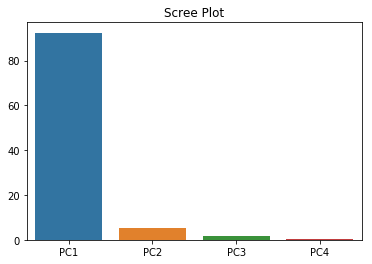

In [147]:
#Scree plot of variance contribution of individual principal components
data_pca = For_PCA(dataset=dataset)
data_pca.scree_plot()

In [148]:
#Dimensionality reduction and new dataframe of principal components
data_pca = data_pca.pca()
data_pca.head()


,PC1,PC2
0,-2.684126,-0.319397
1,-2.714142,0.177001
2,-2.888991,0.144949
3,-2.745343,0.318299
4,-2.728717,-0.326755


In [149]:
#Adding class labels to the new principal components dataframe
data_pca['species'] = pd.read_csv('Iris.csv')['species']
data_pca.head()

,PC1,PC2,species
0,-2.684126,-0.319397,setosa
1,-2.714142,0.177001,setosa
2,-2.888991,0.144949,setosa
3,-2.745343,0.318299,setosa
4,-2.728717,-0.326755,setosa


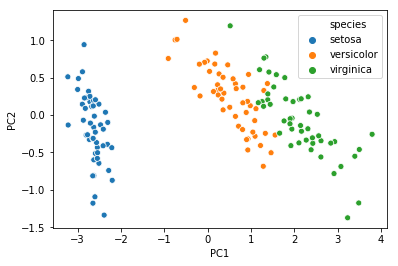

In [151]:
#Plot using two new dimensions (attributes)
sns.scatterplot(data_pca['PC1'],data_pca['PC2'],hue=data_pca['species'])